# Análisis Exploratorio de Datos

En este Notebook realizaré un análisis exploratorio de datos sobre un data set que describe las cuatro de las siete P's de mercadotecnia de un negocio. 
+ **Personas**, con la información demografica de los consimidores e información general como la fecha de registro en la tienda, cantidad de quejas y los días que han pasado desde la última compra.
+ **Producto**, se describe la cantidad gastada en algunas líneas de productos en los últimos años.
+ **Promoción**, muestra la respuesta de cada cliente a las campañas promocionales que se le han presentado.
+ **Plaza**, indica la cantidad de productos comprados en los diferentes medios de venta.

Los pasos a seguir en este análisis serán:
1) Importar librerías
1) Carga de los datos
1) Exploración previa
1) Preguntas de investigación
1) Limpieza y preparación de los datos
1) EDA

## 1. Importamos las librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import date

## 2. Darga de los datos

In [2]:
datos_iniciales = pd.read_csv('..\Datos\marketing_campaign.csv', sep = '\t')

## 3. Exploración previa

In [3]:
#Visualizamos los datos para tener una idea de los datos con los que contamos

datos_iniciales.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#Revisamos el tipo de datos que tenemos y las dimensiones del dataset, en este caso tenemos 2,240 observaciones y 29 variables.

datos_iniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 4. Preguntas de Investigación
* ¿Cuál es el rango de edades de los clientes? 
* ¿Cuál es el nivel de educación de los clientes?
* ¿Cuál es el estado civil de los clientes?
* ¿Cuántos de los clientes tienen menores en casa?
* ¿Cuál es el ingreso promedio de los clientes?
* ¿Cuánto tiempo han estados inscritos en la tienda?
* ¿En qué línea de productos gastan más?
* ¿Qué medio de compra prefieren los clientes?
* ¿Qué campaña ha tenido mejor respuesta?
* ¿Tiene relación el gasto con el nivel de educación?
* ¿Tiene relación el gasto con la cantidad de menores en casa?
* ¿En qué departamento gastan más los clientes con menores en casa?
* ¿En qué departamento gastan más los clientes sin pareja?
* ¿Se relaciona el ingreso con el gasto?


## 5. Limpieza y preparación de los datos

### Procesamiento de los valores nulos

In [5]:
#Revisamos el porcentaje de datos son nulos
datos_iniciales.isnull().sum()/(datos_iniciales.shape[0]/100)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

**Únicamente el 1% de los datos en income son nulos y al no saber si se trata de clientes sin ingresos o clientes que no quisieron responder, se omitirán del análisis.**

In [6]:
datos_sinnull = datos_iniciales.dropna()

### Limpieza de datos

In [7]:
datos_sinnull.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [8]:
datos_sinnull['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [9]:
datos_sinnull.Education = datos_sinnull.Education.replace({'Graduation':'Licenciatura/Ingeniería', 'PhD':'Doctorado', 'Master':'Maestría', '2n Cycle':'Maestría', 'Basic':'Educación media/básica'})

C:\Users\VIRID\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Ya que 2n cycle y Maestría son equivalentes se realizó el cambio y se unificaron el resto de niveles educativos.**

In [10]:
datos_sinnull.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
datos_sinnull['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
datos_sinnull.Marital_Status = datos_sinnull.Marital_Status.replace({'Single':'Solterx', 'Divorced':'Divorciadx', 'Together':'Unión libre', 'Married':'Casadx', 'Widow':'Viudx', 'Alone':'Solterx', 'Absurd':'Solterx','YOLO':'Solterx'})

**Se unificaron y simplicaron los estatus maritales**

In [13]:
datos_sinnull = datos_sinnull.rename(columns = {'MntWines':'Vinos', 'MntFruits':'Frutas', 'MntMeatProducts':'Carnes', 'MntFishProducts':'Pescados', 'MntSweetProducts':'Postres', 'MntGoldProds':'Linea_Dorada'})


**Se cambiaron algunos nombres de columnas, únicamente los que se utilizaran en el análisis.**

In [14]:
datos_sinnull['meses_registro'] = pd.to_datetime(datos_sinnull.Dt_Customer, dayfirst = True, format = '%d-%m-%Y')
#meses_registro['meses_registro'] = pd.to_numeric(datos_sinnull.meses_registro.dt.date.apply(lambda z: (date.today() - z)).dt.days, downcast = 'integer') / 30

**Se cambio el tipo de dato de la fecha de registro del cliente.**

### Nuevas variables

In [15]:
datos_sinnull['Edad'] = date.today().year - datos_sinnull['Year_Birth']
datos_sinnull.Edad.describe()

count    2216.000000
mean       52.179603
std        11.985554
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Edad, dtype: float64

In [16]:
mayores = datos_sinnull[(datos_sinnull['Edad']>99)].index
datos_sinnull.drop(mayores, inplace=True) 

**Se calculó una columna con la edad y se omitieron las observaciones cuando la edad sobrepasa 99 años**

In [17]:
datos_sinnull['menores'] = datos_sinnull['Kidhome'] + datos_sinnull['Teenhome']
filtromenores = datos_sinnull['menores'] > 0
datos_sinnull[filtromenores]['menores'].value_counts()
def Tienemenores(menores):
    val = 0
    if (menores > 0):
        val = 1
    return val

datos_sinnull['menores'] = datos_sinnull['menores'].apply(Tienemenores)
datos_sinnull = datos_sinnull.rename(columns={'menores':'Tienemenores'})
datos_sinnull["Tienemenores"] = np.where(datos_sinnull.Tienemenores > 0, 'Con menores', 'Sin menores')

In [18]:
datos_sinnull['total_menores'] = datos_sinnull['Kidhome'] + datos_sinnull['Teenhome']

**Se creo una variable que indica si el cliente vive con menores.**

In [19]:
datos_sinnull['Gasto'] = datos_sinnull.Vinos + datos_sinnull.Frutas + datos_sinnull.Carnes + datos_sinnull.Pescados + datos_sinnull.Postres + datos_sinnull.Linea_Dorada

**Se creo una variable con el gasto total de cada cliente**

In [20]:
datos_sinnull = datos_sinnull.rename(columns = {'Income':'Ingresos', 'Marital_Status':'Estado_Civil', 'Education':'Educacion', 'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalogo', 'NumStorePurchases':'Tienda', 'NumWebVisitsMonth':'WebVisitas', 'AcceptedCmp1':'C1', 'AcceptedCmp2':'C2', 'AcceptedCmp3':'C3', 'AcceptedCmp4':'C4', 'AcceptedCmp5':'C5'})
datos_sinnull.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Educacion,Licenciatura/Ingeniería,Licenciatura/Ingeniería,Licenciatura/Ingeniería,Licenciatura/Ingeniería,Doctorado
Estado_Civil,Solterx,Solterx,Unión libre,Unión libre,Casadx
Ingresos,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
Vinos,635,11,426,11,173


**Se cambiaron algunos nombres de columnas.**

In [21]:
datos = datos_sinnull[['ID', 'meses_registro', 'Edad', 'Educacion', 'Ingresos', 'Tienemenores', 'total_menores',  'Estado_Civil', 'Vinos', 'Frutas', 'Carnes', 'Pescados', 'Postres', 'Linea_Dorada', 'Gasto', 'Web', 'Catalogo', 'Tienda','C1', 'C2', 'C3', 'C4', 'C5']]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2213 non-null   int64         
 1   meses_registro  2213 non-null   datetime64[ns]
 2   Edad            2213 non-null   int64         
 3   Educacion       2213 non-null   object        
 4   Ingresos        2213 non-null   float64       
 5   Tienemenores    2213 non-null   object        
 6   total_menores   2213 non-null   int64         
 7   Estado_Civil    2213 non-null   object        
 8   Vinos           2213 non-null   int64         
 9   Frutas          2213 non-null   int64         
 10  Carnes          2213 non-null   int64         
 11  Pescados        2213 non-null   int64         
 12  Postres         2213 non-null   int64         
 13  Linea_Dorada    2213 non-null   int64         
 14  Gasto           2213 non-null   int64         
 15  Web 

**Se creó un dataframe únicamente con los datos que se van a utilizar en el análisis**

## 6. EDA

### ¿Cuál es el rango de edades de los clientes?

[Text(0.5, 1.0, 'Edad de los clientes'),
 Text(0, 0.5, ''),
 Text(0.5, 0, 'Edad')]

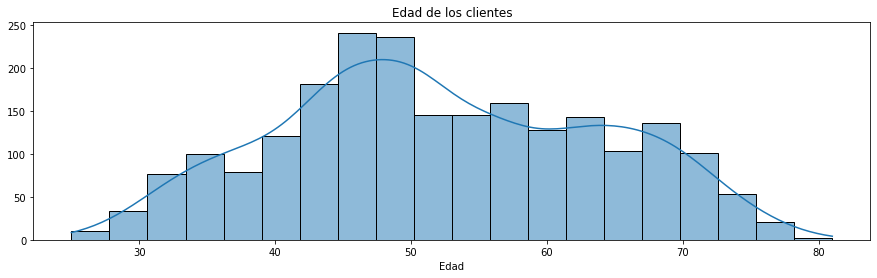

In [22]:
plt.subplots(figsize=(15, 4))
ax = sns.histplot(data = datos.Edad, bins=20, kde=True, palette = 'viridis')
ax.set(title = 'Edad de los clientes', ylabel= None, xlabel = 'Edad')

###¿Cuál es el nivel de educación de los clientes?

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Nivel educativo de los clientes')]

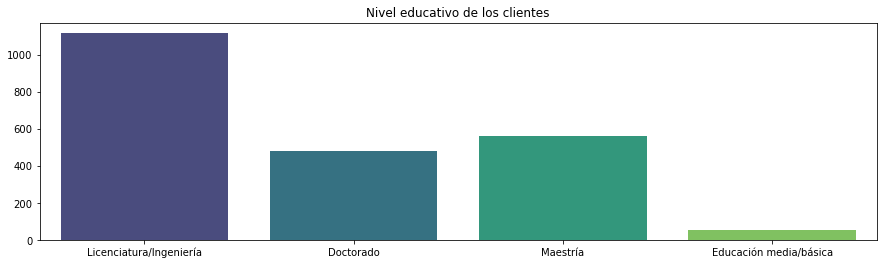

In [23]:
plt.subplots(figsize=(15, 4))
ax = sns.countplot(data = datos, x = 'Educacion', palette = 'viridis')
ax.set(xlabel = None, ylabel = None, title = "Nivel educativo de los clientes")

### ¿Cuál es el estado civil de los clientes?

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Estdo Civil de los clientes')]

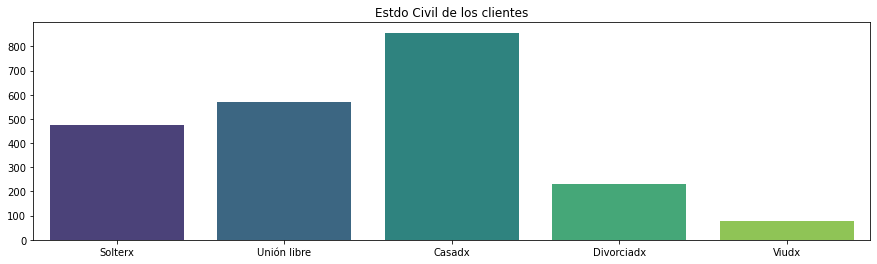

In [24]:
plt.subplots(figsize=(15, 4))
ax = sns.countplot(data = datos, x = 'Estado_Civil', palette = 'viridis')
ax.set(xlabel = None, ylabel = None, title = "Estdo Civil de los clientes")

### ¿Cuántos de los clientes tienen menores en casa?

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Clientes que viven con menores')]

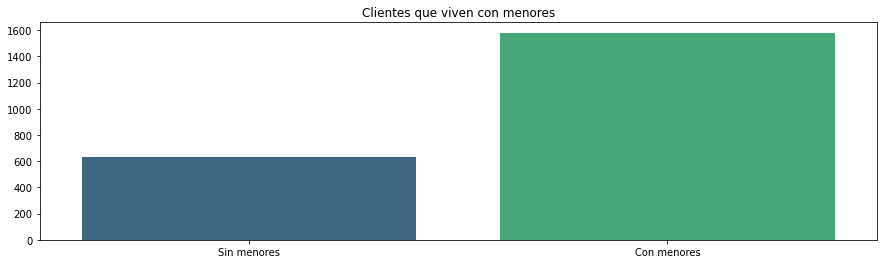

In [25]:
plt.subplots(figsize=(15, 4))
ax = sns.countplot(data = datos, x = "Tienemenores", palette = "viridis")
ax.set(xlabel=None, ylabel=None, title = "Clientes que viven con menores")

### ¿Cuál es el ingreso promedio de los clientes?

[Text(0.5, 1.0, 'Ingreso'), Text(0, 0.5, ''), Text(0.5, 0, 'Ingreso')]

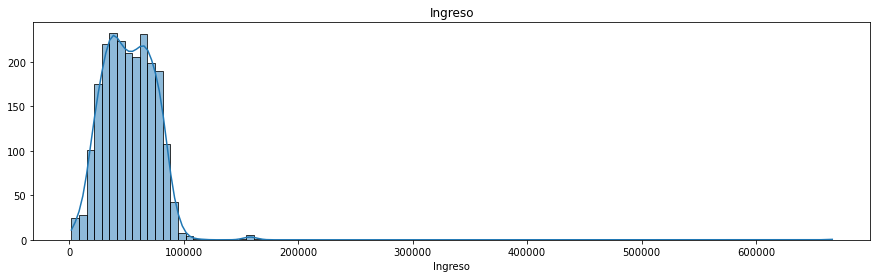

In [26]:
plt.subplots(figsize=(15, 4))
ax = sns.histplot(data = datos.Ingresos, bins=100, kde=True, palette = 'viridis')
ax.set(title = 'Ingreso', ylabel= None, xlabel = 'Ingreso')

### ¿Cuánto tiempo han estados inscritos en la tienda?

### ¿En qué línea de productos gastan más?

In [27]:
Lineas_productos = datos[['Vinos','Frutas','Carnes','Pescados','Postres','Linea_Dorada']].sum().sort_values(ascending = False)
Lineas_productos

Vinos           675305
Carnes          369488
Linea_Dorada     97176
Pescados         83287
Postres          59828
Frutas           58255
dtype: int64

### ¿Qué medio de compra prefieren los clientes?

In [28]:
Medios = datos[['Web','Tienda','Catalogo']].sum().sort_values(ascending = False)
Medios

Tienda      12847
Web          9046
Catalogo     5912
dtype: int64

### ¿Qué campaña ha tenido mejor respuesta?

In [29]:
Campañas = datos[['C1','C2','C3','C4','C5']].sum().sort_values(ascending = False)
Campañas

C4    164
C3    163
C5    161
C1    142
C2     30
dtype: int64

### ¿Tiene relación el gasto con el nivel de educación?

### ¿Tiene relación el gasto con la cantidad de menores en casa?

C:\Users\VIRID\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Hábitos de consumo')

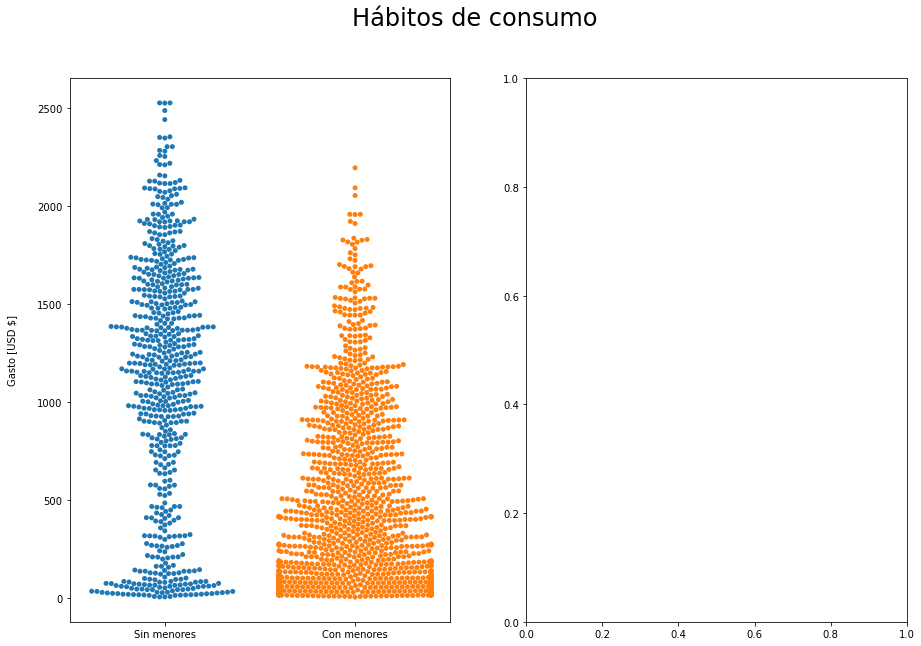

In [36]:
fig, ax = plt.subplots(1,2, figsize = (15,10))
sns.swarmplot(ax = ax[0], x = datos.Tienemenores, y = datos.Gasto)
sns.swarmplot(ax = ax[1], x = datos.Estado_Civil, y = datos.Gasto)

ax[0].set_ylabel('Gasto [USD $]', labelpad = 20)
ax[1].set_ylabel(None)

for i in [0,1]:
    ax[i].set_xlabel(None)
    
plt.suptitle('Hábitos de consumo', fontsize = 24)

### ¿En qué departamento gastan más los clientes con menores en casa?

### ¿En qué departamento gastan más los clientes sin pareja?

### ¿Se relaciona el ingreso con el gasto?

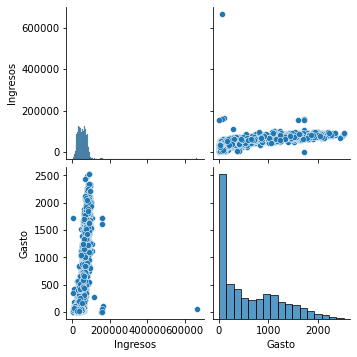

In [30]:
sns.pairplot(datos, vars=['Ingresos', 'Gasto'])
plt.show()

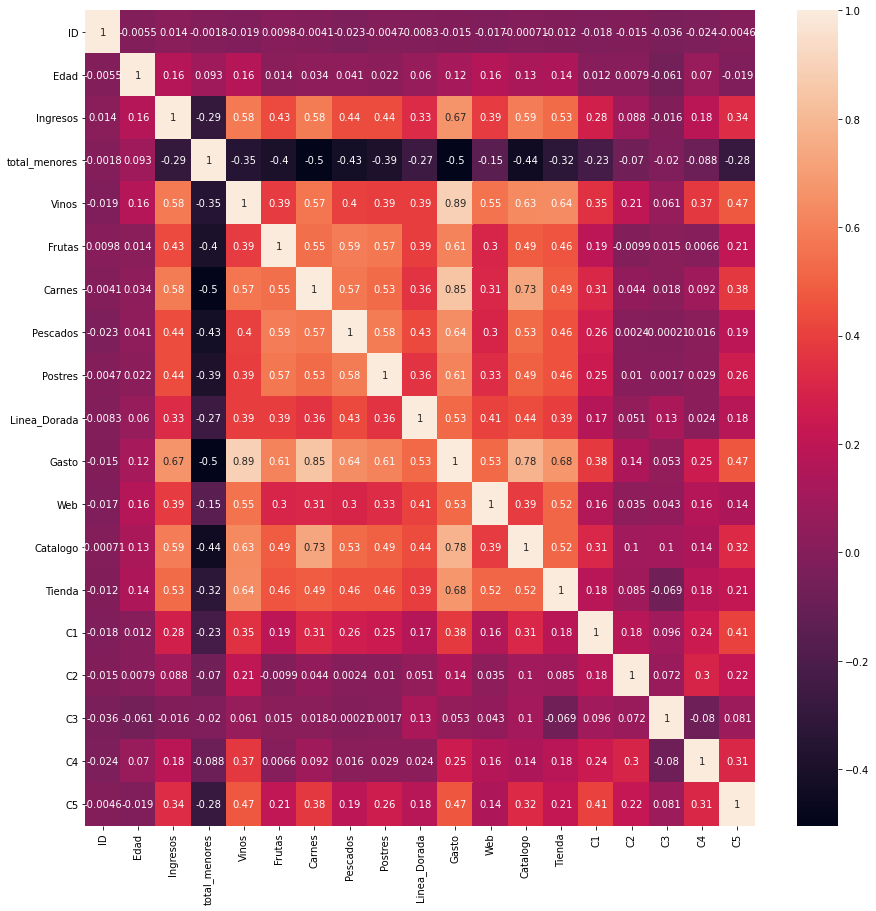

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(datos.corr(), annot=True)
plt.show()